<a href="https://colab.research.google.com/github/Jectrianama/GCCE_TEST/blob/main/GCECDL1/Occupancy_gcce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Subclassing for GCE

In [1]:
!git clone https://github.com/Jectrianama/GCCE_TEST.git

Cloning into 'GCCE_TEST'...
remote: Enumerating objects: 672, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 672 (delta 146), reused 215 (delta 122), pack-reused 407
Receiving objects: 100% (672/672), 30.44 MiB | 18.45 MiB/s, done.
Resolving deltas: 100% (314/314), done.


In [2]:
 
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import mode 
import numpy as np

def ook(t):
  lb = LabelBinarizer()
  y_ook = lb.fit_transform(t)  

  if len(np.unique(t))==2:
    y_ook = np.concatenate((1-y_ook.astype(bool), y_ook), axis = 1) 

  return y_ook

In [3]:
#cargar datos desde drive otros dataset
FILEID = "1AU8pTtCLihBjCZjWITaAzpnEuL4RO436"
#https://drive.google.com/file/d/1AU8pTtCLihBjCZjWITaAzpnEuL4RO436/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  DataGCCE.zip && rm -rf /tmp/cookies.txt
!unzip -o DataGCCE.zip
!dir

--2023-02-11 05:15:24--  https://docs.google.com/uc?export=download&confirm=&id=1AU8pTtCLihBjCZjWITaAzpnEuL4RO436
Resolving docs.google.com (docs.google.com)... 173.194.79.101, 173.194.79.138, 173.194.79.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.79.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fmf55idgqi3182jfol50t3e1srn8qrtr/1676092500000/07591141114418430227/*/1AU8pTtCLihBjCZjWITaAzpnEuL4RO436?e=download&uuid=1561c2be-36c0-435e-b783-13f5c4163375 [following]
--2023-02-11 05:15:25--  https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fmf55idgqi3182jfol50t3e1srn8qrtr/1676092500000/07591141114418430227/*/1AU8pTtCLihBjCZjWITaAzpnEuL4RO436?e=download&uuid=1561c2be-36c0-435e-b783-13f5c4163375
Resolving doc-00-90-docs.googleusercontent.com (doc-00-90-docs.googleusercontent.com)... 108.177.119.132, 

# Load Data

In [4]:
#cargar datos desde drive acceso libre
FILEID = "1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW"
#https://drive.google.com/file/d/1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O MADatasets.zip && rm -rf /tmp/cookies.txt
!unzip -o MADatasets.zip
!dir

--2023-02-11 05:15:26--  https://docs.google.com/uc?export=download&confirm=t&id=1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW
Resolving docs.google.com (docs.google.com)... 173.194.79.101, 173.194.79.138, 173.194.79.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.79.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4n7fqglcqi35sg601uc5o3qp4k4gjr8u/1676092500000/07591141114418430227/*/1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW?e=download&uuid=f639cb40-3d76-477d-a93f-7c021e9caee2 [following]
--2023-02-11 05:15:27--  https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4n7fqglcqi35sg601uc5o3qp4k4gjr8u/1676092500000/07591141114418430227/*/1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW?e=download&uuid=f639cb40-3d76-477d-a93f-7c021e9caee2
Resolving doc-00-90-docs.googleusercontent.com (doc-00-90-docs.googleusercontent.com)... 108.177.119.132,

In [5]:
#load data
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf #importar tensorflow
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np
database = 'Ocupancy'#['bupa1', 'breast-cancer-wisconsin1','pima-indians-diabetes1', 'ionosphere1', 'tic-tac-toe1', 'iris1', 'wine1', 'segmentation1']


import pandas as pd
from sklearn.preprocessing import LabelEncoder

dfo= pd.read_csv(r'/content//file.csv')
dfo
 
#Removing the HumidityRatio attribute which is least correlated to the target attribute 
t=dfo['Occupancy'].values
X = dfo.drop(['HumidityRatio','Occupancy'], axis = 1).values

t=t+1

In [6]:
import os
os.chdir('/content/GCCE_TEST/Models')
from  keras_ma_gcce import *
from labels_generation import MA_Clas_Gen

# Labels Generation  

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


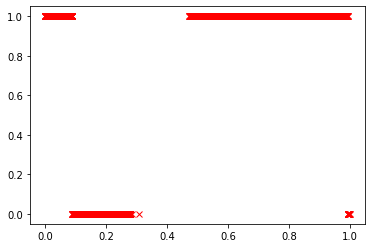

In [7]:
Y, iAnn, Lam_r = MA_Clas_Gen(X ,t, R=5, NrP=1)

In [8]:

Y = Y - 1
t = t - 1



annotator 1
              precision    recall  f1-score   support

           0       1.00      0.76      0.86      1693
           1       0.71      1.00      0.83       972

    accuracy                           0.85      2665
   macro avg       0.85      0.88      0.85      2665
weighted avg       0.89      0.85      0.85      2665

annotator 2
              precision    recall  f1-score   support

           0       1.00      0.33      0.50      1693
           1       0.46      1.00      0.63       972

    accuracy                           0.58      2665
   macro avg       0.73      0.67      0.57      2665
weighted avg       0.80      0.58      0.55      2665

annotator 3
              precision    recall  f1-score   support

           0       0.74      0.96      0.84      1693
           1       0.85      0.41      0.56       972

    accuracy                           0.76      2665
   macro avg       0.80      0.69      0.70      2665
weighted avg       0.78      0.76     

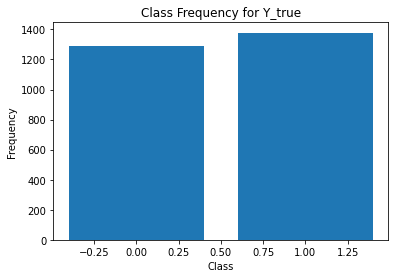

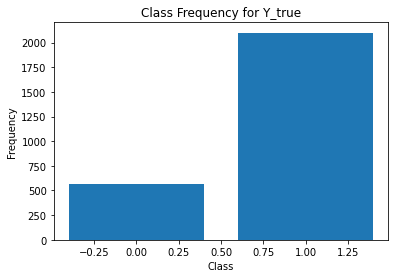

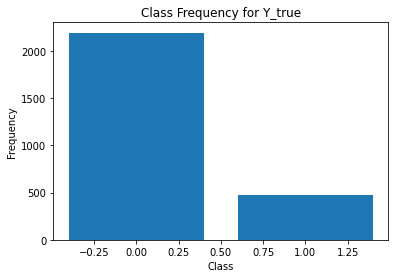

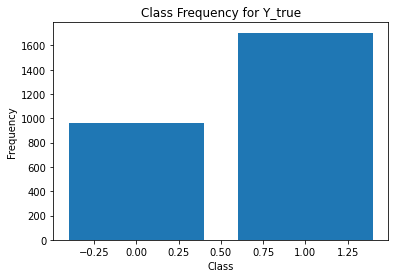

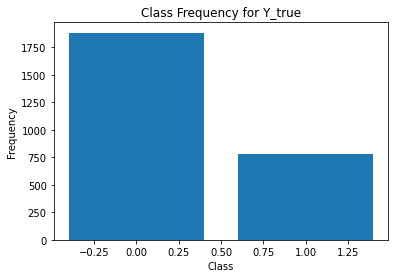

In [9]:
from sklearn.metrics import classification_report
for i in range(Y.shape[1]):
    print('annotator',i+1)
    print(classification_report(t,Y[:,i]))
    unique, counts = np.unique(Y[:,i], return_counts=True)
    plt.figure()
    plt.bar(unique, counts)
#     unique, counts = np.unique(Y_test[5], return_counts=True)
#     plt.bar(unique, counts)

    plt.title('Class Frequency for Y_true')
    plt.xlabel('Class')
    plt.ylabel('Frequency')


# Split data

In [10]:
import numpy.matlib
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
Ns = 1
ss = ShuffleSplit(n_splits=Ns, test_size=0.3,random_state =123)
for train_index, test_index in ss.split(X):
    print(test_index)
    X_train, X_test,Y_train,Y_test = X[train_index,:], X[test_index,:],Y[train_index,:], Y[test_index,:]
    Y_true_train, Y_true_test = t[train_index].reshape(-1,1), t[test_index].reshape(-1,1)
print(X_train.shape, Y_train.shape, Y_true_train.shape)

[ 315  235 1480 1538 1087 1009 1677 1094  343 2175 1455 2535 2641  798
  417 2238 1781 1445   85 1828 2029 1034 1067 1458 2455  732 2434 2247
 2113 2386  689  853 2200 2500  179 1245 1758 1927  709 1826 2529 1099
  805  601 1022 1730 2135 1361 2294 2644  206  420  878 2093 1400 1518
  934 1622 1279  613  957  190   33 1450  335 1371 2634  103  304 1228
 2242 2384 1637  673  222 2340 1765  360  289   25   45 1937  537 1237
 1183 2095 2375 2379 2390 2170 2607  589 1833 2628  354  189 2016 1286
 1116  556 1918  937 1740  803 2435  257  807 1697 2494 2538  249  683
 1673 1391  871 1064 1364  814  184  498 1898 1017 1055  906  645  242
  684  779  784 1696 1226  423  966 2596  649 1008 2402  101 1283 1529
 2417 1449  616 1107 1845 1011 1572 2525 2380 2651  704 1089  466 1853
 2462 1726 2502 2479 1710 1050  469  220  336  263 1535  554 2590 1273
 2543  861  449 1224 1957 2537 1106  114 1213 2194  830  973 1504 2168
  777 1975  996 2025 2094  707  994 2315 1970  748 1982 2430 1511   43
 2291 

# Apply MinMaxScaler

In [11]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Testing the Class 


iteration: 0


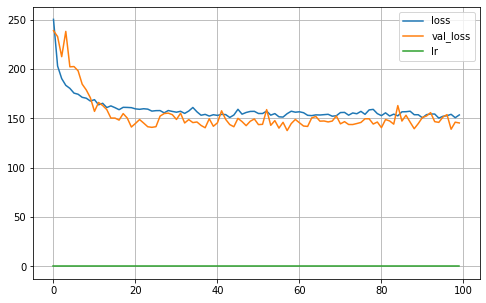

25/25 [==============================] - 0s 2ms/step
Validation ACC: 0.9550
Validation Balanced_ACC: 0.9039
Validation MI: 0.4649
Validation Normalized MI: 0.7198
Validation Adjusted MI: 0.7196
Validation aUc: 0.9519
Validation aUc_Sklearn: 0.9871
iteration: 1


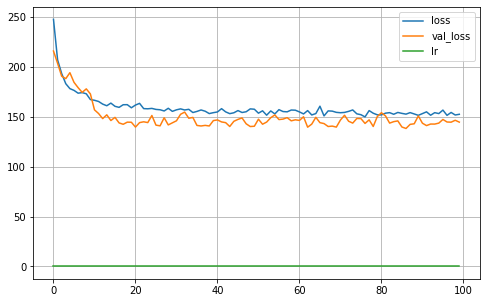

25/25 [==============================] - 0s 2ms/step
Validation ACC: 0.9625
Validation Balanced_ACC: 0.9325
Validation MI: 0.4997
Validation Normalized MI: 0.7676
Validation Adjusted MI: 0.7674
Validation aUc: 0.9662
Validation aUc_Sklearn: 0.9877
iteration: 2


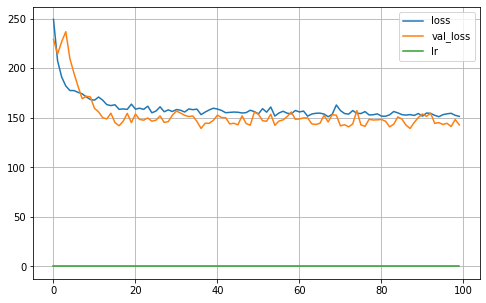

25/25 [==============================] - 0s 2ms/step
Validation ACC: 0.9650
Validation Balanced_ACC: 0.9260
Validation MI: 0.4963
Validation Normalized MI: 0.7684
Validation Adjusted MI: 0.7682
Validation aUc: 0.9630
Validation aUc_Sklearn: 0.9893
iteration: 3


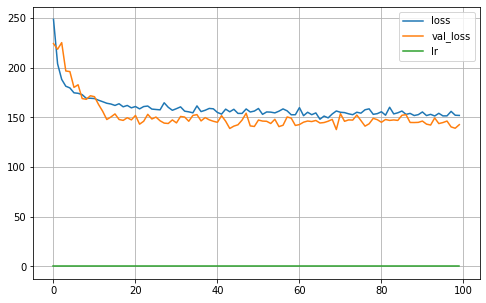

25/25 [==============================] - 0s 2ms/step
Validation ACC: 0.9537
Validation Balanced_ACC: 0.9054
Validation MI: 0.4640
Validation Normalized MI: 0.7164
Validation Adjusted MI: 0.7161
Validation aUc: 0.9527
Validation aUc_Sklearn: 0.9882
iteration: 4


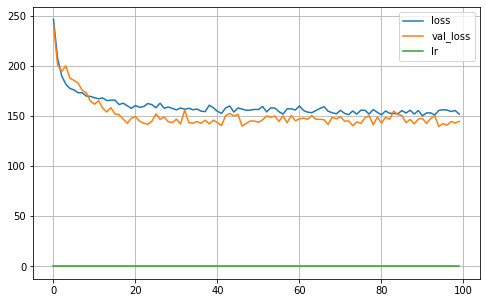

25/25 [==============================] - 0s 2ms/step
Validation ACC: 0.9587
Validation Balanced_ACC: 0.9182
Validation MI: 0.4808
Validation Normalized MI: 0.7414
Validation Adjusted MI: 0.7412
Validation aUc: 0.9591
Validation aUc_Sklearn: 0.9878
iteration: 5


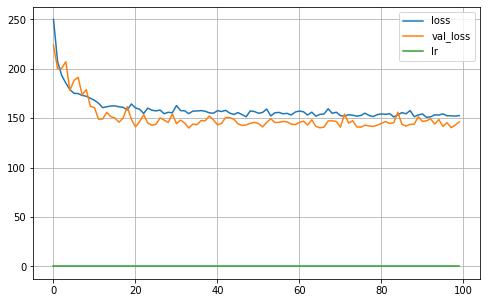

25/25 [==============================] - 0s 2ms/step
Validation ACC: 0.9575
Validation Balanced_ACC: 0.9163
Validation MI: 0.4777
Validation Normalized MI: 0.7361
Validation Adjusted MI: 0.7359
Validation aUc: 0.9581
Validation aUc_Sklearn: 0.9874
iteration: 6


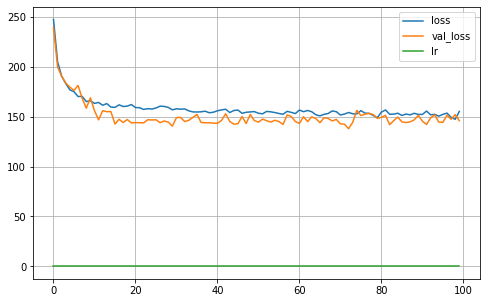

25/25 [==============================] - 0s 2ms/step
Validation ACC: 0.9575
Validation Balanced_ACC: 0.9180
Validation MI: 0.4793
Validation Normalized MI: 0.7379
Validation Adjusted MI: 0.7376
Validation aUc: 0.9590
Validation aUc_Sklearn: 0.9874
iteration: 7


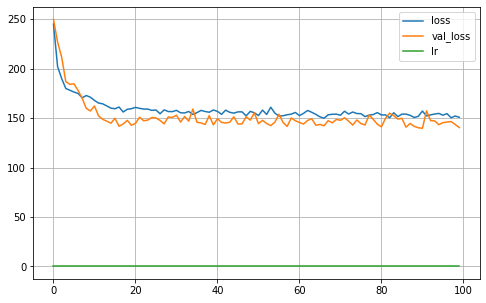

25/25 [==============================] - 0s 2ms/step
Validation ACC: 0.9625
Validation Balanced_ACC: 0.9170
Validation MI: 0.4864
Validation Normalized MI: 0.7549
Validation Adjusted MI: 0.7546
Validation aUc: 0.9585
Validation aUc_Sklearn: 0.9891
iteration: 8


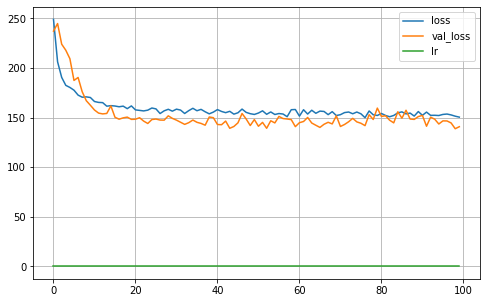

25/25 [==============================] - 0s 2ms/step
Validation ACC: 0.9688
Validation Balanced_ACC: 0.9420
Validation MI: 0.5159
Validation Normalized MI: 0.7947
Validation Adjusted MI: 0.7945
Validation aUc: 0.9710
Validation aUc_Sklearn: 0.9909
iteration: 9


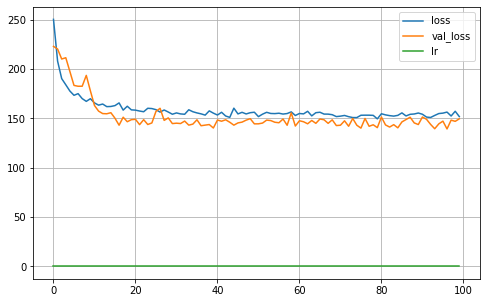

25/25 [==============================] - 0s 2ms/step
Validation ACC: 0.9575
Validation Balanced_ACC: 0.9163
Validation MI: 0.4777
Validation Normalized MI: 0.7361
Validation Adjusted MI: 0.7359
Validation aUc: 0.9581
Validation aUc_Sklearn: 0.9883


In [12]:
from sklearn.metrics import classification_report, balanced_accuracy_score,  roc_auc_score
from sklearn.metrics import normalized_mutual_info_score, mutual_info_score, adjusted_mutual_info_score
l1 =0.1
NUM_RUNS =10
ACC = np.zeros(NUM_RUNS)
AUC = np.zeros(NUM_RUNS)
AUCSK = np.zeros(NUM_RUNS)
MI = np.zeros(NUM_RUNS)
NMI = np.zeros(NUM_RUNS)
AMI = np.zeros(NUM_RUNS)
BACC = np.zeros(NUM_RUNS)
for i in range(NUM_RUNS): #10
    print("iteration: " + str(i))
   
    MA = Keras_MA_GCCE(epochs=100,batch_size=64,R=5, K=len(np.unique(Y_true_train)), dropout=0.2, learning_rate=0.01,optimizer='Adam', 
                l1_param=l1,  validation_split=0.30, verbose=0, q=0.1, neurons=4)

    MA.fit(X_train, Y_train)
    MA.plot_history()
  
    #Accuracy
    pred_2 = MA.predict(X_test)
 
    report = classification_report( pred_2[:,Y.shape[1]:].argmax(axis=1),Y_true_test.ravel(),output_dict=True)
    ACC[i] = report['accuracy']
    print("Validation ACC: %.4f" % (float(ACC[i])))


    # balanced. Accurcy
    BACC[i] = balanced_accuracy_score(Y_true_test.squeeze(), pred_2[:,Y.shape[1]:].argmax(axis=1).squeeze(), adjusted=True)
    print("Validation Balanced_ACC: %.4f" % (float(BACC[i])))

    #MI
    
    MI[i] = mutual_info_score(Y_true_test.squeeze(), pred_2[:,Y.shape[1]:].argmax(axis=1).squeeze())
    print("Validation MI: %.4f" % (float(MI[i]),))
    NMI[i] = normalized_mutual_info_score(Y_true_test.squeeze(), pred_2[:,Y.shape[1]:].argmax(axis=1).squeeze())
    print("Validation Normalized MI: %.4f" % (float(NMI[i]),))
    AMI[i]= adjusted_mutual_info_score(Y_true_test.squeeze(), pred_2[:,Y.shape[1]:].argmax(axis=1).squeeze())
    print("Validation Adjusted MI: %.4f" % (float(AMI[i]),))


    #AUC
    val_AUC_metric = tf.keras.metrics.AUC( from_logits = True)  
   # val_logits =MA.predict(X_test) # model(X_test, training=False)
    # tf.print(y_batch_val)
    val_AUC_metric.update_state(Y_true_test, pred_2[:,Y.shape[1]:].argmax(axis=1).astype('float'))

    val_AUC = val_AUC_metric.result()
    val_AUC_metric.reset_states()
    val_AUC = val_AUC.numpy()
    print("Validation aUc: %.4f" % (float(val_AUC),))
    AUC[i] = val_AUC
    val_AUC1 = roc_auc_score(ook(Y_true_test), pred_2[:,Y_train.shape[1]:])
    print("Validation aUc_Sklearn: %.4f" % (float(val_AUC1),))
    AUCSK[i] = val_AUC1


In [13]:

ACC

array([0.955  , 0.9625 , 0.965  , 0.95375, 0.95875, 0.9575 , 0.9575 ,
       0.9625 , 0.96875, 0.9575 ])

In [14]:

AUC

array([0.95193052, 0.96622968, 0.96299374, 0.95269114, 0.95908016,
       0.95812601, 0.9589833 , 0.95851314, 0.97100067, 0.95812601])

In [15]:
print('Average Accuracy: ', np.round( ACC.mean(),4)*100) 
print('Average std: ',np.round(np.std( ACC),4)*100)
print('==============================================')
print('Average AUC: ', np.round( AUC.mean(),4)*100) 
print('Average AUC std: ',np.round(np.std( AUC),4)*100)
print('==============================================')
print('Average AUC Sklearn: ', np.round( AUCSK.mean(),4)*100) 
print('Average AUC SK std: ',np.round(np.std( AUCSK),4)*100)
print('==============================================')
print('Average Balanced Accuracy: ', np.round( BACC.mean(),4)*100) 
print('Average std: ',np.round(np.std( BACC),4)*100)
print('==============================================')
print('Average MI: ', np.round( MI.mean(),4)*100) 
print('Average std: ',np.round(np.std(MI),4)*100)
print('==============================================')
print('Average Normalized MI: ', np.round( NMI.mean(),4)*100) 
print('Average std: ',np.round(np.std(NMI),4)*100)
print('==============================================')
print('Average Ajdusted MI: ', np.round( AMI.mean(),4)*100) 
print('Average std: ',np.round(np.std(AMI),4)*100)

Average Accuracy:  95.99
Average std:  0.44999999999999996
Average AUC:  95.98
Average AUC std:  0.5499999999999999
Average AUC Sklearn:  98.83
Average AUC SK std:  0.11
Average Balanced Accuracy:  91.95
Average std:  1.09
Average MI:  48.43
Average std:  1.51
Average Normalized MI:  74.72999999999999
Average std:  2.29
Average Ajdusted MI:  74.71
Average std:  2.29


In [16]:
import pickle

# create the dictionary with 6 scalar variables
Metrics = {
    'Accuracy': np.round( ACC.mean(),4)*100,
    'Accuracy_std': np.round(np.std( ACC),4)*100,
    'AUC': np.round( AUC.mean(),4)*100,
    'AUC_std': np.round(np.std( AUC),4)*100,
    'Balanced Accuracy': np.round( BACC.mean(),4)*100,
    'Balanced Accuracy_std':  np.round(np.std(BACC),4)*100,
    'MI': np.round( MI.mean(),4)*100,
    'MI_std': np.round(np.std(MI),4)*100,
    'Normalized MI': np.round( NMI.mean(),4)*100,
    'Normalized MI_std': np.round(np.std(NMI),4)*100,
    'Adjusted MI': np.round( AMI.mean(),4)*100,
    'Adjusted MI_std': np.round(np.std(NMI),4)*100,
}

# save the dictionary to a file using pickle
with open('data.pickle', 'wb') as handle:
    pickle.dump(Metrics, handle, protocol=pickle.HIGHEST_PROTOCOL)